In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

In [3]:
user = "aabounak"
password = "mysecretpassword"
host = "localhost"
port = "5432"
database = "piscineds"

def connect_to_postgres():
  return create_engine(
    url=f"postgresql://{user}:{password}@{host}:{port}/{database}"
  )

In [4]:
engine = connect_to_postgres()

In [5]:
# Store the customers table in a DataFrame named customers.
with engine.connect() as connection:
  result = connection.execute(text('select * from customers'))
  data = result.fetchall()

columns_names = result.keys()
df = pd.DataFrame(data, columns=columns_names)

<AxesSubplot: ylabel='event_type'>

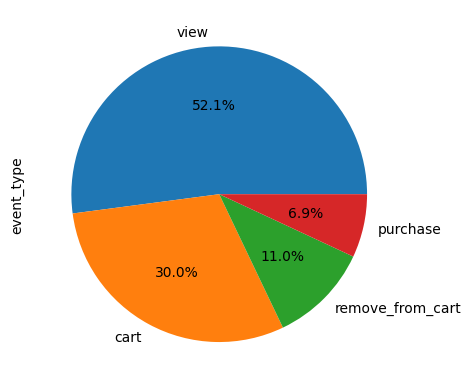

In [6]:
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')